In [48]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import simulation as sim
import onedquad as onedquad
import control as control
import onedphysics as phy

In [49]:
quad = onedquad.createquad()
clock = sim.Model("clock", control.Clock())
mcu = sim.Controller("mcu", control.ProfileRegulator())
model = sim.Compound("")

world = sim.Simulation(model)
model.setio("time", world.get("time"))
model.setparam('ground.e',1000.0)
model.setparam('ground.fr',0.2)
model.setparam('frame.v',0)
model.setparam('frame.x',0)
model.setparam('clock.frequency',5)
model.setparam('motor.e',20.0)
model.setparam('profile.profile', [(0,9.9),(30,9.7)])

In [50]:
model.getallparams()

{'frame': {'x': 0, 'v': 0, 'm': 1.0},
 'motor': {'thrust': 0.0, 'e': 20.0},
 'ground': {'e': 1000.0, 'fr': 0.2},
 'clock': {'clock': 0.0, 'frequency': 5},
 'profile': {'target': 0.0, 'profile': [(-1e+17, 0.0), (0, 9.9), (30, 9.7)]}}

In [51]:
sym = pd.DataFrame(world.simulate(0.0,80.0,0.0001))
sym

,time,framex,framev,motorthrust,clockclock,profiletarget
0,0.0000,0.000000e+00,0.000000,0.000,0.0,0.0
1,0.0001,0.000000e+00,-0.000980,0.000,0.2,9.9
2,0.0002,-9.800000e-08,-0.001960,0.002,0.2,9.9
3,0.0003,-2.940000e-07,-0.002940,0.004,0.2,9.9
4,0.0004,-5.879751e-07,-0.003919,0.006,0.2,9.9
...,...,...,...,...,...,...
799995,79.9995,8.017316e+01,-1.871773,9.700,80.0,9.7
799996,79.9996,8.017297e+01,-1.871783,9.700,80.0,9.7
799997,79.9997,8.017278e+01,-1.871793,9.700,80.0,9.7
799998,79.9998,8.017259e+01,-1.871803,9.700,80.0,9.7


<IPython.core.display.Javascript object>


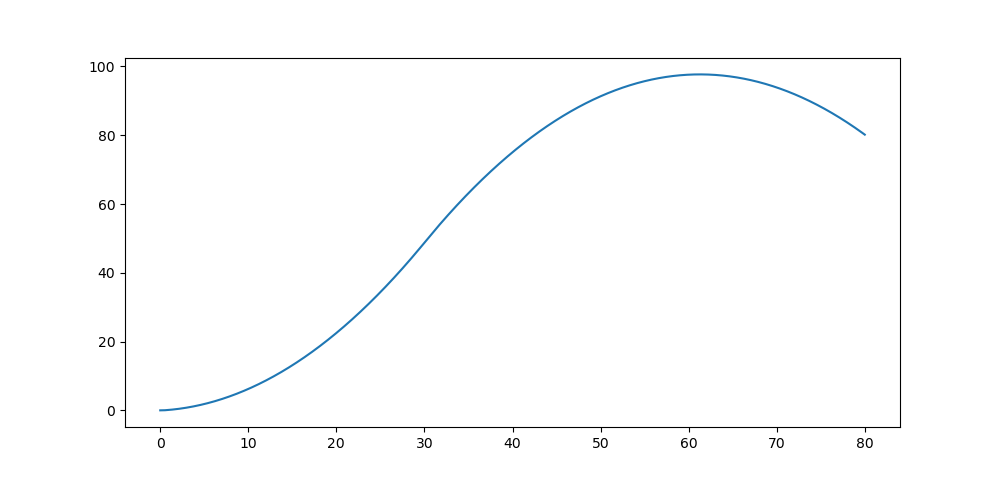

In [52]:
fig = plt.figure()
fig.set_figwidth(10)
ax = fig.add_subplot(1, 1, 1)
ax.plot(sym[['time']],sym[['framex']])
#ax.plot(sym[['time']],sym[['profiletarget']])
#ax.plot(sym[['time']],sym[['motorthrust']])